<a href="https://colab.research.google.com/github/OmBayus/global-inflation-and-cost-of-living/blob/master/total_gni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
data_country = pd.read_csv("/boot/worldbank/Metadata_Country.csv")
data_country

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia,NaN


In [188]:
data_country = data_country.drop(['SpecialNotes',
       'Unnamed: 5', 'TableName'],axis=1)
data_country

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income
...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income
261,YEM,Middle East & North Africa,Low income
262,ZAF,Sub-Saharan Africa,Upper middle income
263,ZMB,Sub-Saharan Africa,Low income


In [189]:
data_apı = pd.read_csv("/boot/worldbank/API_NY.csv")
data_apı

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,Aruba,ABW,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,1.348704e+09,1.507408e+09,1.630343e+09,1.778312e+09,1.966271e+09,...,3.394442e+09,3.570659e+09,3.676607e+09,3.729453e+09,3.762902e+09,3.871874e+09,4.120241e+09,4.318084e+09,3.630104e+09,4.413866e+09
1,1,Africa Eastern and Southern,AFE,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,5.252900e+11,5.496851e+11,5.363200e+11,5.620301e+11,5.836479e+11,...,1.706038e+12,1.818526e+12,1.953199e+12,2.029313e+12,2.154919e+12,2.229494e+12,2.341466e+12,2.441760e+12,2.410926e+12,2.614134e+12
2,2,Afghanistan,AFG,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,...,5.976096e+10,6.526676e+10,6.905035e+10,7.248108e+10,7.079649e+10,7.569509e+10,7.821093e+10,8.317463e+10,8.167068e+10,6.735835e+10
3,3,Africa Western and Central,AFW,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,3.419573e+11,3.591495e+11,3.743899e+11,3.734074e+11,3.858889e+11,...,1.343607e+12,1.434352e+12,1.587069e+12,1.618247e+12,1.633343e+12,1.683432e+12,1.763607e+12,1.869062e+12,1.876355e+12,2.027718e+12
4,4,Angola,AGO,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,3.528582e+10,4.036908e+10,2.050092e+10,1.941602e+10,1.694164e+10,...,1.709762e+11,1.853921e+11,2.069808e+11,1.942011e+11,1.941902e+11,2.045893e+11,2.032423e+11,2.025000e+11,1.947924e+11,2.062782e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Kosovo,XKX,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,...,1.499289e+10,1.560726e+10,1.601447e+10,1.700556e+10,1.800877e+10,1.906577e+10,2.012512e+10,2.158221e+10,2.070528e+10,2.376189e+10
262,262,"Yemen, Rep.",YEM,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,2.404333e+10,2.570927e+10,2.874408e+10,3.074271e+10,3.350268e+10,...,8.165254e+10,8.858868e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,263,South Africa,ZAF,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,2.512328e+11,2.597692e+11,2.609892e+11,2.709927e+11,2.863091e+11,...,6.807273e+11,7.128576e+11,7.235163e+11,7.415145e+11,7.529676e+11,7.682627e+11,7.984222e+11,8.176918e+11,7.816117e+11,8.519421e+11
264,264,Zambia,ZMB,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,1.083741e+10,1.085141e+10,1.108591e+10,1.240549e+10,1.174390e+10,...,4.867012e+10,5.123093e+10,5.339811e+10,5.341651e+10,5.399205e+10,5.613183e+10,6.159734e+10,6.348030e+10,6.177311e+10,6.323621e+10


In [190]:
data_apı = data_apı.drop(['Indicator Name',
       'Indicator Code'],axis=1)
data_apı

,Unnamed: 0,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,Aruba,ABW,1.348704e+09,1.507408e+09,1.630343e+09,1.778312e+09,1.966271e+09,2.068994e+09,2.128553e+09,...,3.394442e+09,3.570659e+09,3.676607e+09,3.729453e+09,3.762902e+09,3.871874e+09,4.120241e+09,4.318084e+09,3.630104e+09,4.413866e+09
1,1,Africa Eastern and Southern,AFE,5.252900e+11,5.496851e+11,5.363200e+11,5.620301e+11,5.836479e+11,6.351921e+11,6.829375e+11,...,1.706038e+12,1.818526e+12,1.953199e+12,2.029313e+12,2.154919e+12,2.229494e+12,2.341466e+12,2.441760e+12,2.410926e+12,2.614134e+12
2,2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.976096e+10,6.526676e+10,6.905035e+10,7.248108e+10,7.079649e+10,7.569509e+10,7.821093e+10,8.317463e+10,8.167068e+10,6.735835e+10
3,3,Africa Western and Central,AFW,3.419573e+11,3.591495e+11,3.743899e+11,3.734074e+11,3.858889e+11,4.049771e+11,4.201348e+11,...,1.343607e+12,1.434352e+12,1.587069e+12,1.618247e+12,1.633343e+12,1.683432e+12,1.763607e+12,1.869062e+12,1.876355e+12,2.027718e+12
4,4,Angola,AGO,3.528582e+10,4.036908e+10,2.050092e+10,1.941602e+10,1.694164e+10,3.260849e+10,3.468627e+10,...,1.709762e+11,1.853921e+11,2.069808e+11,1.942011e+11,1.941902e+11,2.045893e+11,2.032423e+11,2.025000e+11,1.947924e+11,2.062782e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.499289e+10,1.560726e+10,1.601447e+10,1.700556e+10,1.800877e+10,1.906577e+10,2.012512e+10,2.158221e+10,2.070528e+10,2.376189e+10
262,262,"Yemen, Rep.",YEM,2.404333e+10,2.570927e+10,2.874408e+10,3.074271e+10,3.350268e+10,3.524175e+10,3.581331e+10,...,8.165254e+10,8.858868e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,263,South Africa,ZAF,2.512328e+11,2.597692e+11,2.609892e+11,2.709927e+11,2.863091e+11,3.010792e+11,3.190189e+11,...,6.807273e+11,7.128576e+11,7.235163e+11,7.415145e+11,7.529676e+11,7.682627e+11,7.984222e+11,8.176918e+11,7.816117e+11,8.519421e+11
264,264,Zambia,ZMB,1.083741e+10,1.085141e+10,1.108591e+10,1.240549e+10,1.174390e+10,1.235182e+10,1.345005e+10,...,4.867012e+10,5.123093e+10,5.339811e+10,5.341651e+10,5.399205e+10,5.613183e+10,6.159734e+10,6.348030e+10,6.177311e+10,6.323621e+10


In [191]:
data_apı.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    266 non-null    int64  
 1   Country Name  266 non-null    object 
 2   Country Code  266 non-null    object 
 3   1990          189 non-null    float64
 4   1991          192 non-null    float64
 5   1992          197 non-null    float64
 6   1993          202 non-null    float64
 7   1994          205 non-null    float64
 8   1995          217 non-null    float64
 9   1996          218 non-null    float64
 10  1997          220 non-null    float64
 11  1998          220 non-null    float64
 12  1999          220 non-null    float64
 13  2000          229 non-null    float64
 14  2001          231 non-null    float64
 15  2002          233 non-null    float64
 16  2003          233 non-null    float64
 17  2004          233 non-null    float64
 18  2005          234 non-null    

In [192]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  265 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   216 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


In [193]:
data_apı.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    266 non-null    int64  
 1   Country Name  266 non-null    object 
 2   Country Code  266 non-null    object 
 3   1990          189 non-null    float64
 4   1991          192 non-null    float64
 5   1992          197 non-null    float64
 6   1993          202 non-null    float64
 7   1994          205 non-null    float64
 8   1995          217 non-null    float64
 9   1996          218 non-null    float64
 10  1997          220 non-null    float64
 11  1998          220 non-null    float64
 12  1999          220 non-null    float64
 13  2000          229 non-null    float64
 14  2001          231 non-null    float64
 15  2002          233 non-null    float64
 16  2003          233 non-null    float64
 17  2004          233 non-null    float64
 18  2005          234 non-null    

In [194]:
data_country["IncomeGroup"].unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

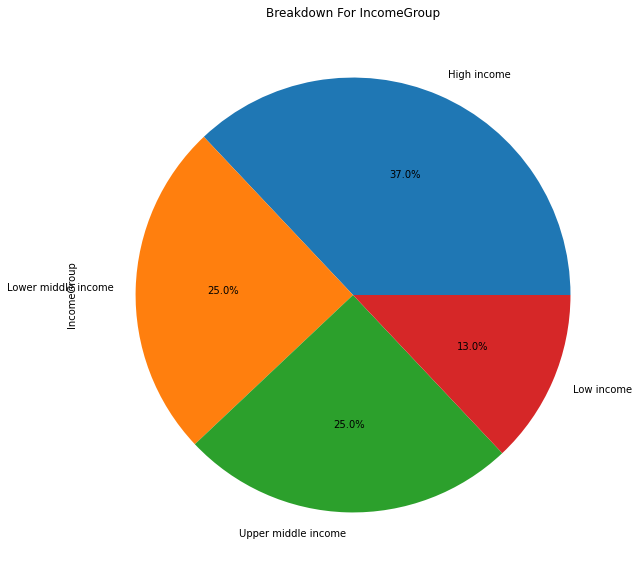

In [209]:
data_country.dropna(subset = ['IncomeGroup'], inplace=True)
data_country.IncomeGroup.value_counts().plot(kind='pie',autopct='%1.1f%%',title='Breakdown For IncomeGroup',figsize=(10,10),fontsize=10)

In [196]:
data_apı = data_apı.drop(259)

In [197]:
data_apı = data_apı.drop(103)

In [198]:
high_income = data_apı['2021'].idxmax()
data_apı.iloc[high_income]

Unnamed: 0                  141
Country Name            Lesotho
Country Code                LSO
1990            2219299255.0321
1991            2343827458.7146
1992             2439043855.266
1993             2476749576.788
1994             2637776287.054
1995            2704274158.7187
1996            2912725621.9072
1997            3039381230.8397
1998            3025677085.7424
1999            3143928824.2445
2000            3249977094.5521
2001            3907148434.1305
2002            4000763138.6076
2003            4210776482.7992
2004            4219654063.8563
2005            4260506300.4708
2006            4395818049.5605
2007            5260949033.5494
2008            5496619136.8138
2009            5313416878.9813
2010            5522874015.7633
2011             5495695487.382
2012            5431655705.7357
2013            5971898849.8787
2014            6384113068.0489
2015            7086503862.7911
2016            7046118125.5237
2017             6340290088.866
2018    

In [199]:
from matplotlib import patheffects
import geopandas
import os

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [200]:
dfc = pd.DataFrame(data_apı)
df3 = dfc.rename({'Country Name': 'name'}, axis=1)

In [201]:
world = pd.merge(world, df3, how='inner', on='name')

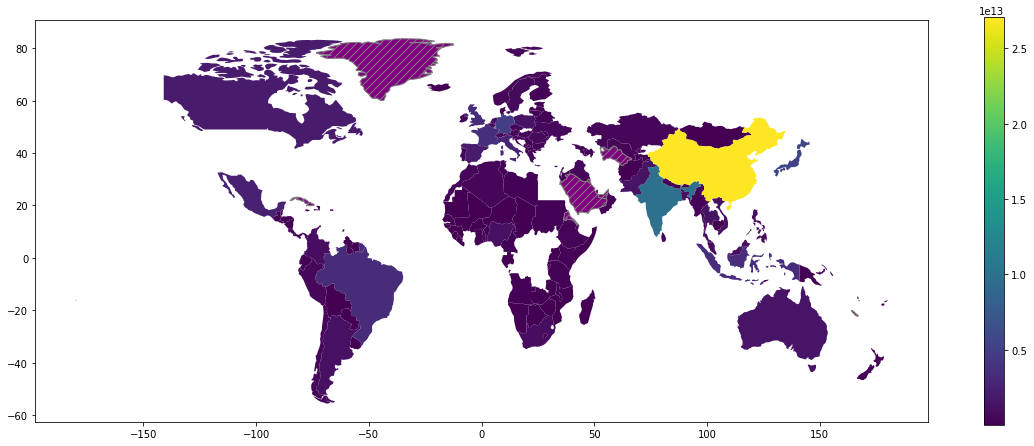

In [202]:
apıworld = world.plot(column='2021', legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15), missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})


In [203]:
years = data_apı.iloc[:,3:34].isnull().mean()
years_ = data_apı.columns[3:34]

In [204]:
import plotly.graph_objects as go
years = data_apı.iloc[:,3:34].mean()
years_ = data_apı.columns[3:34]
fig = go.Figure(
    data=[go.Bar(y=years,x=years_)],
    layout_title_text="Annual average income of countries"
)
fig.show()

In [205]:
from sklearn.model_selection import train_test_split

x = years_.astype(int).to_numpy()
y = years.astype(float).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [206]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr = linear_model.LinearRegression()
x_train = x_train.reshape(-1,1)
lr.fit(x_train,y_train)

x_test = x_test.reshape(-1, 1)
pr = lr.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, pr))
print("Mean Absolute Error: ",mean_absolute_error(y_test, pr))

Mean Squared Error:  4.3413653549346734e+22
Mean Absolute Error:  184736751013.06723


In [207]:
import plotly.graph_objects as go

line = np.polyfit(x, y, 1)
poly = np.poly1d(line)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='inflation rate'))
fig.add_trace(go.Scatter(x=x, y=poly(x),
                    mode='lines',
                    name='polynom'))

fig.show()

In [208]:
from sklearn.metrics import r2_score
r2 = r2_score(y,poly(x))
r2

0.9548839946359932